In [123]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "mental-health-dataset"

# **Import**

In [219]:
library(dplyr)
library(psych)
library(lubridate)
library(ggplot2)

# **1. Data Import & Structure**

In [125]:
data <- read.csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv', stringsAsFactors = T)

* **Timestamp: Indicates the date and time when the survey or data entry was recorded.**
* **Gender: Represents the gender of the individual participating in the survey. This could include options like male, female, non-binary, etc.**
* **Country: Specifies the country in which the respondent resides or is located.**
* **Occupation: Describes the type of work or job that the individual is engaged in.**
* **Self_employed: Indicates whether the respondent is self-employed or not.**
* **Family_history: Denotes whether the individual has a family history of mental health issues.**
* **Treatment: Represents whether the respondent has gone any treatment for mental health issues.**
* **Days_Indoors: Provides information on the number of days the individual spends indoors.**
* **Growing_Stress: The current level of stress the respondent feels.**
* **Changes_Habits: Has the respondent experienced any changes in sleeping habits or patterns?**
* **Mental_Health_History: Specifies whether the individual has a history of mental health issues.**
* **Mood_Swings: Describes the presence or absence of mood swings in the respondent.**
* **Coping_Struggles: Indicates whether the individual is facing challenges in coping with their mental health.**
* **Work_Interest: Reflects the level of interest or engagement the respondent has in their work.**
* **Social_Weakness: Denotes the presence of social weaknesses or difficulties in social interactions.**
* **Mental_health_interview: Specifies whether the respondent want to be interviewed about their mental health.**
* **Care_options: Represents wheather the respondent want mental health care options.**

In [126]:
str(data)

'data.frame':	292364 obs. of  17 variables:
 $ Timestamp              : Factor w/ 734 levels "2014-08-27 11:29:31",..: 1 6 7 18 31 39 43 44 60 88 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ Country                : Factor w/ 35 levels "Australia","Belgium",..: 35 35 35 35 35 26 1 35 35 35 ...
 $ Occupation             : Factor w/ 5 levels "Business","Corporate",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ self_employed          : Factor w/ 3 levels "","No","Yes": 1 1 1 2 2 2 2 2 2 2 ...
 $ family_history         : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 1 2 1 1 1 ...
 $ treatment              : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 1 1 ...
 $ Days_Indoors           : Factor w/ 5 levels "1-14 days","15-30 days",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Growing_Stress         : Factor w/ 3 levels "Maybe","No","Yes": 3 3 3 3 3 3 3 3 3 3 ...
 $ Changes_Habits         : Factor w/ 3 levels "Maybe","No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Mental_Health_Histor

In [127]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Timestamp*,1,292364,366.932297,212.0444356,367,366.786260,272.7984,1,734,733,0.004399233,-1.2031196,0.3921614799
Gender*,2,292364,1.820381,0.3838701,2,1.900475,0.0000,1,2,1,-1.669212404,0.7862727,0.0007099411
Country*,3,292364,29.699081,10.1884488,35,32.243848,0.0000,1,35,34,-1.771157575,1.5604604,0.0188428295
Occupation*,4,292364,3.050971,1.3853265,3,3.063713,1.4826,1,5,4,-0.001367609,-1.2386348,0.0025620652
self_employed*,5,292364,2.081973,0.3329260,2,2.000000,0.0000,1,3,2,1.467823662,4.7559091,0.0006157235
family_history*,6,292364,1.395165,0.4888869,1,1.368957,0.0000,1,2,1,0.428870991,-1.8160759,0.0009041625
treatment*,7,292364,1.504871,0.4999771,2,1.506088,0.0000,1,2,1,-0.019483387,-1.9996272,0.0009246730
Days_Indoors*,8,292364,2.963309,1.4201646,3,2.954137,1.4826,1,5,4,0.010030924,-1.3013974,0.0026264959
Growing_Stress*,9,292364,1.998864,0.8263423,2,1.998581,1.4826,1,3,2,0.002110137,-1.5355335,0.0015282628


In [128]:
head(data)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2014-08-27 11:29:31,Female,United States,Corporate,,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
2,2014-08-27 11:31:50,Female,United States,Corporate,,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
3,2014-08-27 11:32:39,Female,United States,Corporate,,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
4,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
5,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
6,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure


**Missing Value Check**

In [149]:
colSums(is.na(data))

Timestamp                  Gender                 Country 
                      0                       0                       0 
             Occupation           self_employed          family_history 
                      0                       0                       0 
              treatment            Days_Indoors          Growing_Stress 
                      0                       0                       0 
         Changes_Habits   Mental_Health_History             Mood_Swings 
                      0                       0                       0 
       Coping_Struggles           Work_Interest         Social_Weakness 
                      0                       0                       0 
mental_health_interview            care_options 
                      0                       0

In [130]:
summary(data)

               Timestamp         Gender                 Country      
 2014-08-27 12:31:41:   780   Female: 52514   United States :171308  
 2014-08-27 12:54:11:   780   Male  :239850   United Kingdom: 51404  
 2014-08-27 11:29:31:   434                   Canada        : 18726  
 2014-08-27 11:31:50:   434                   Australia     :  6026  
 2014-08-27 11:32:39:   434                   Netherlands   :  5894  
 2014-08-27 11:37:59:   434                   Ireland       :  5548  
 (Other)            :289068                   (Other)       : 33458  
     Occupation    self_employed family_history treatment   
 Business :50149      :  5202    No :176832     No :144758  
 Corporate:61229   No :257994    Yes:115532     Yes:147606  
 Housewife:66351   Yes: 29168                               
 Others   :52841                                            
 Student  :61794                                            
                                                            
             

----------------

# **2. Data Transform**

In [131]:
data$Timestamp <- as.Date(data$Timestamp)

In [132]:
data$Growing_Stress <- ifelse(data$Growing_Stress == 'Yes','1',
                             ifelse(data$Growing_Stress == 'No','0','2'))
data$Growing_Stress <- as.factor(data$Growing_Stress)

In [155]:
data$Year <- year(data$Timestamp)
data$Month <- month(data$Timestamp)

-------------

# **3. Data Visualization**

**Frequency by variable**

In [202]:
cols = colnames(data[,c(-1,-3,-18,-19)])

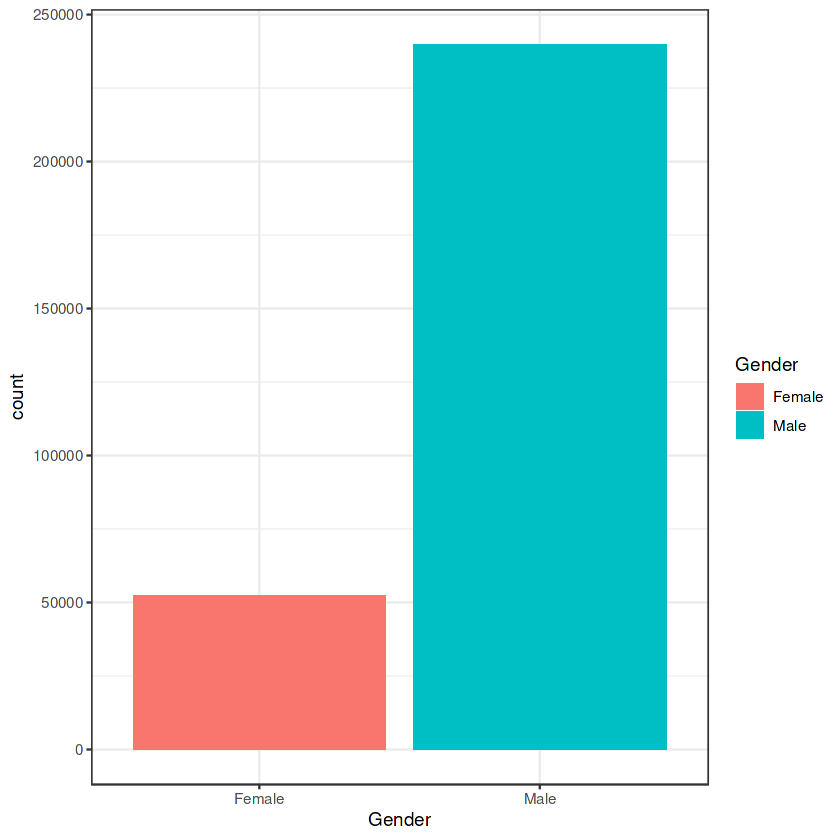

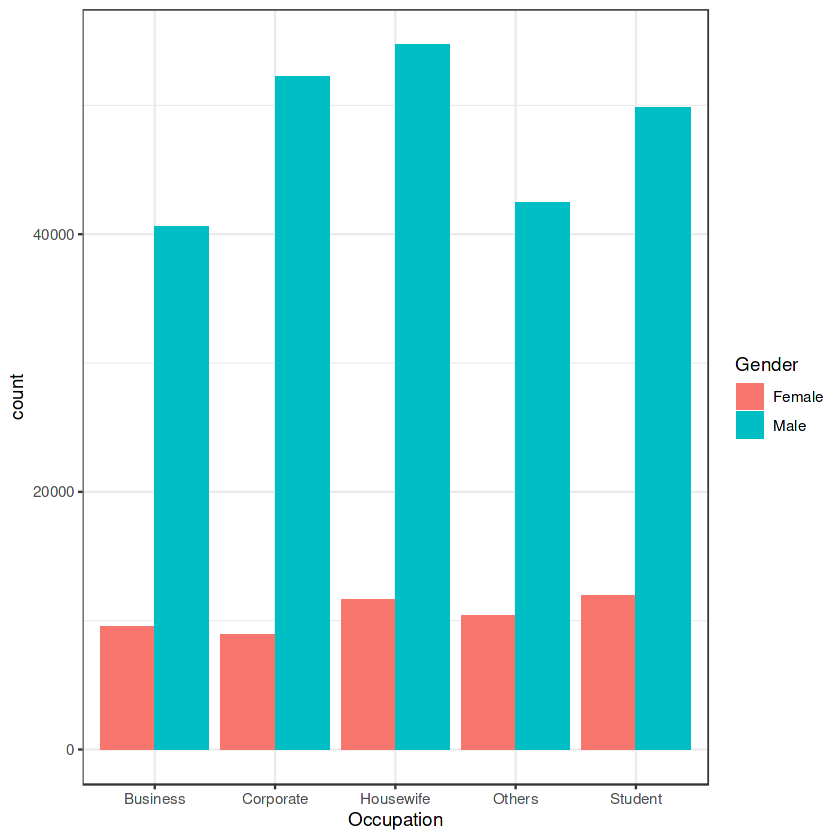

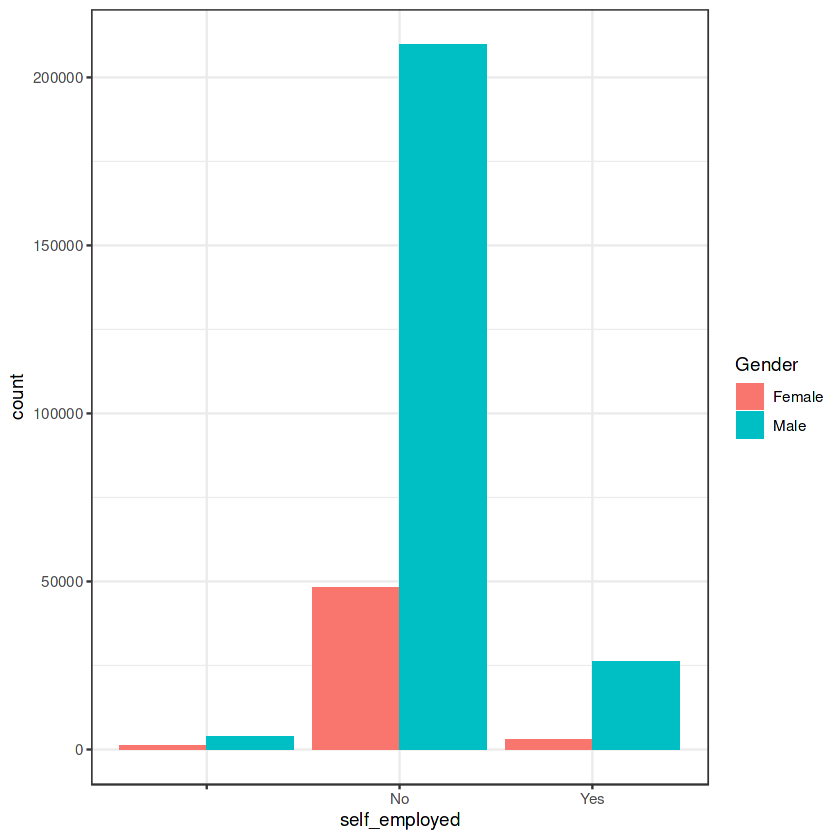

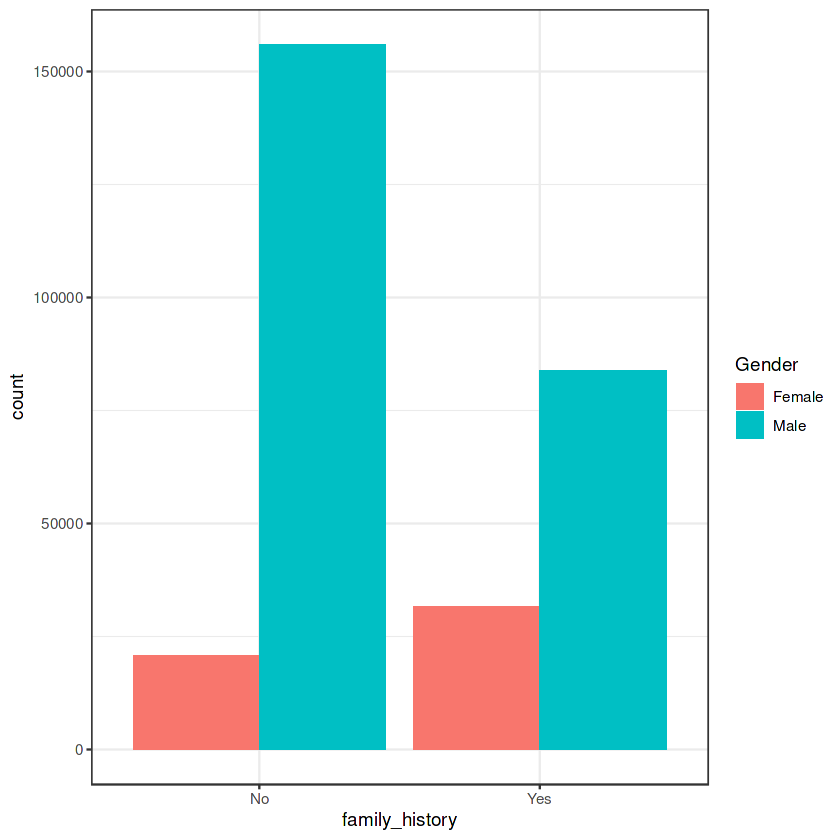

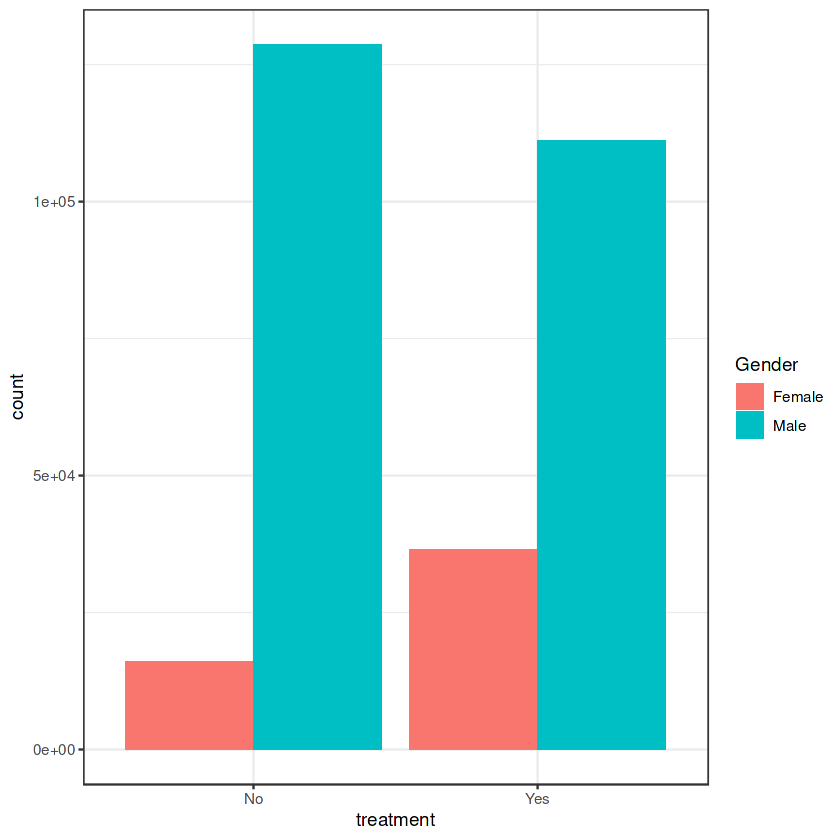

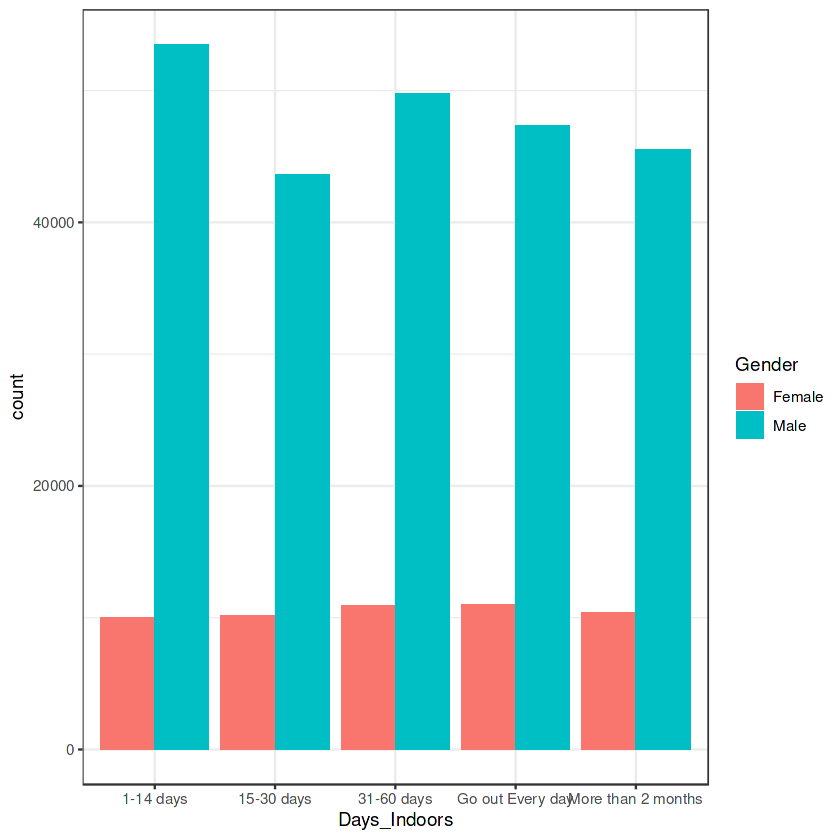

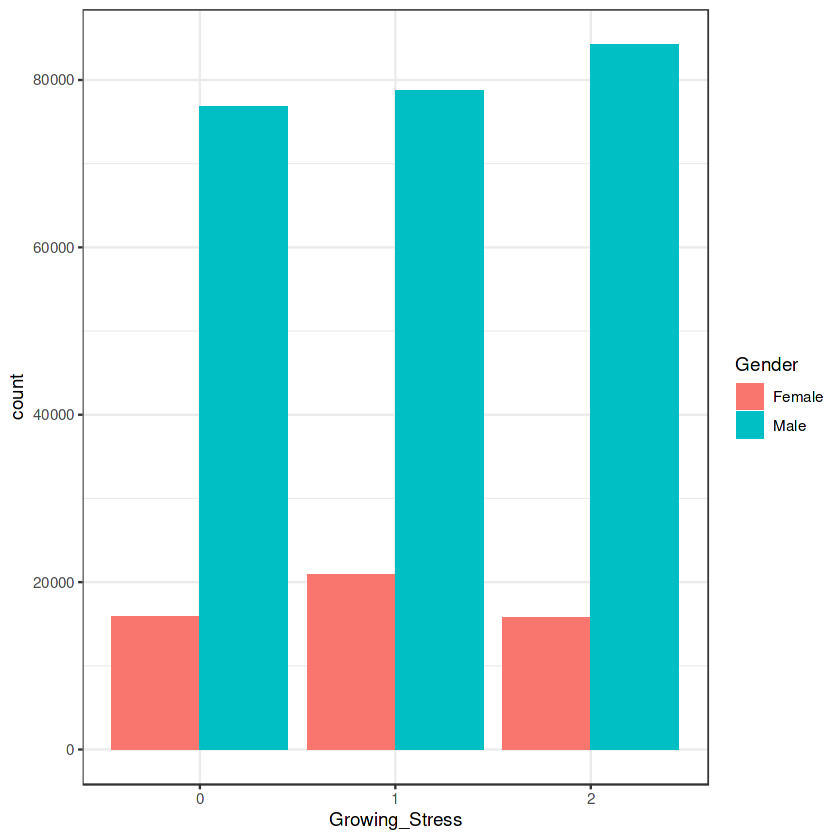

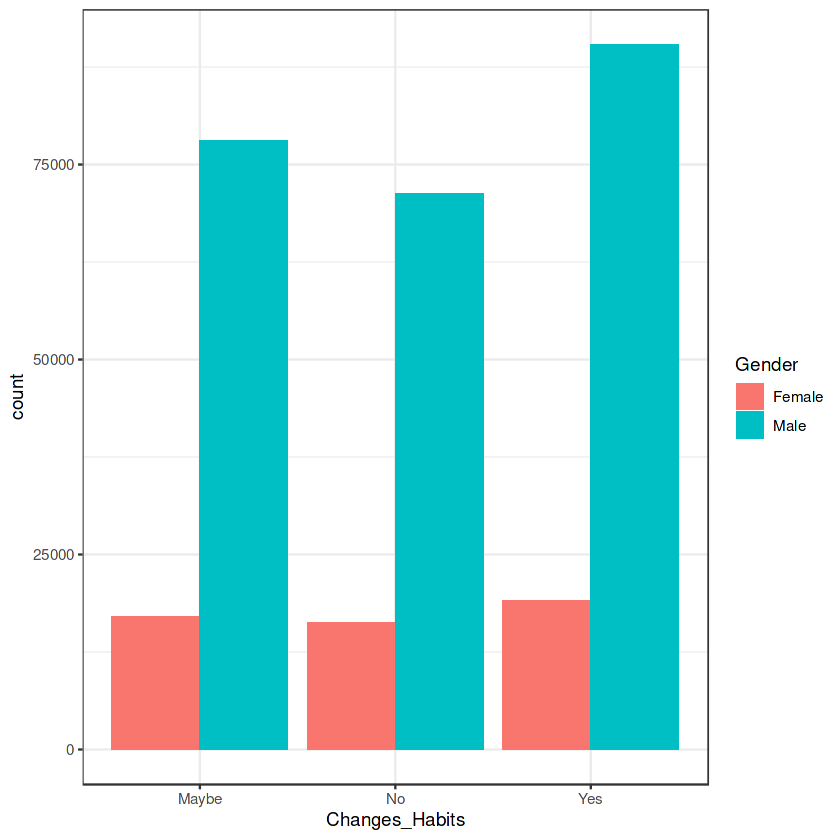

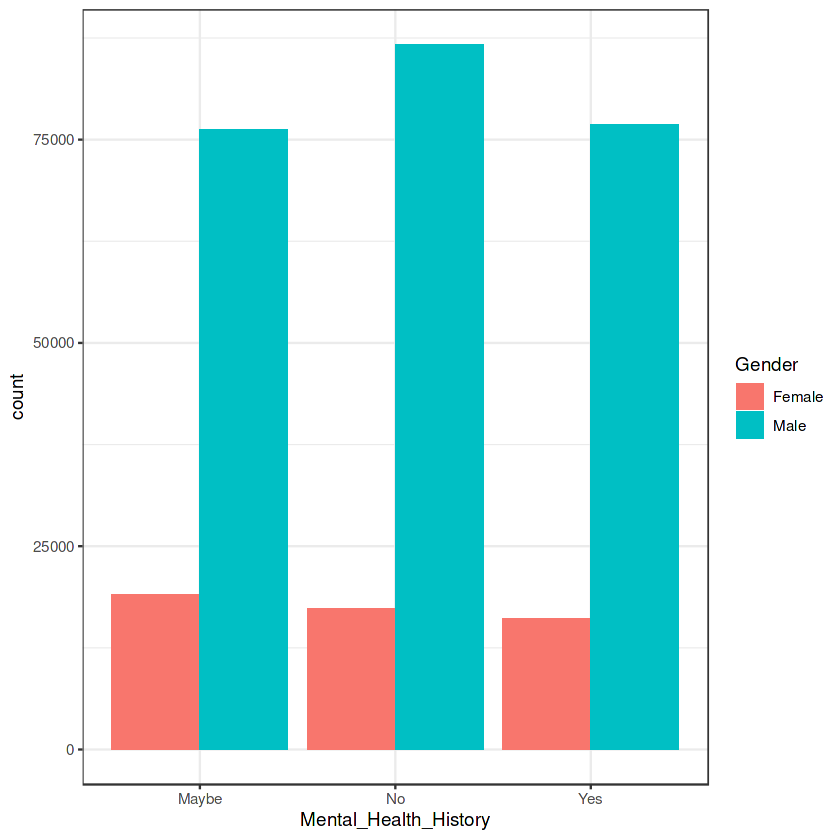

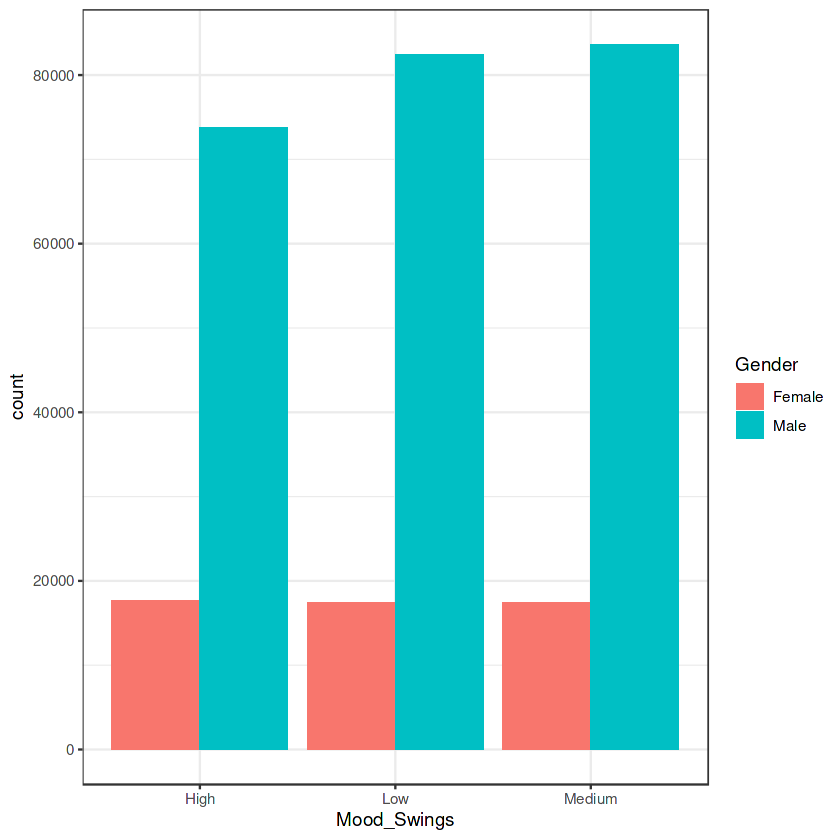

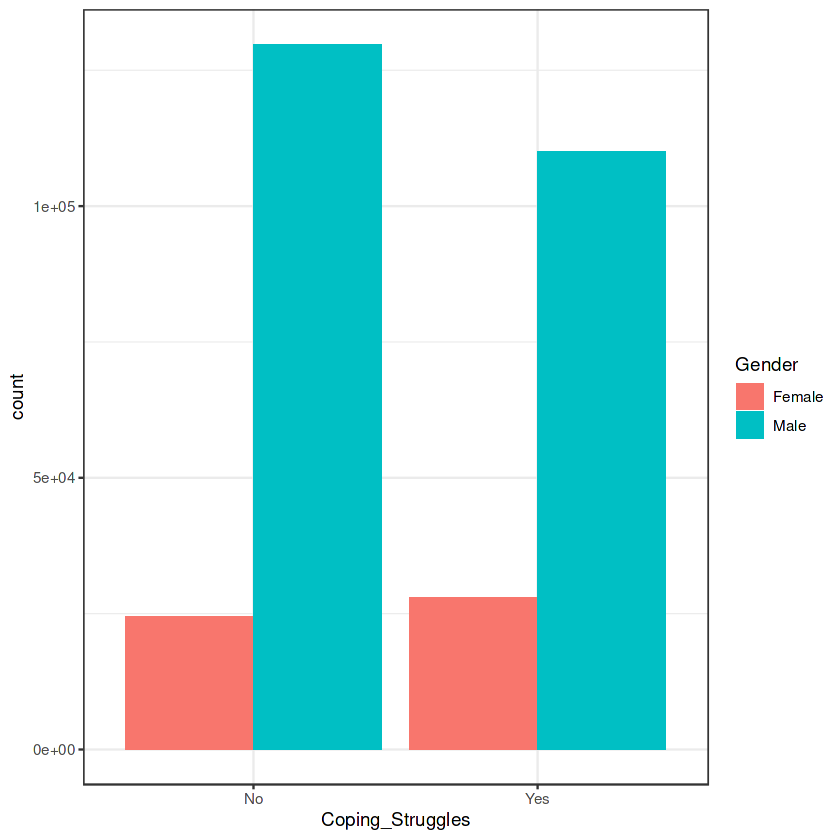

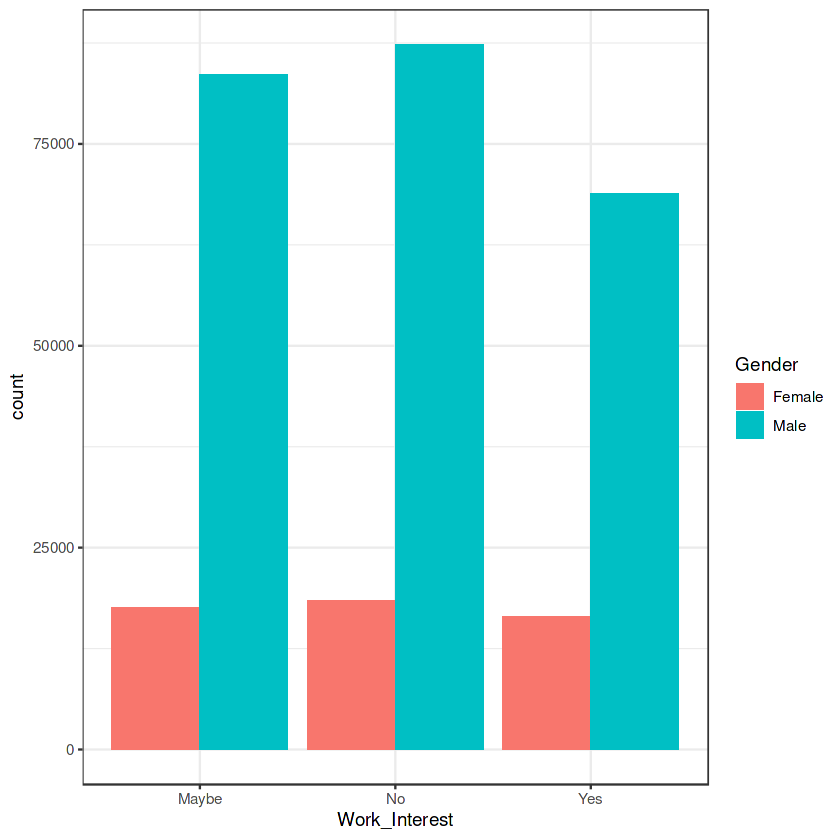

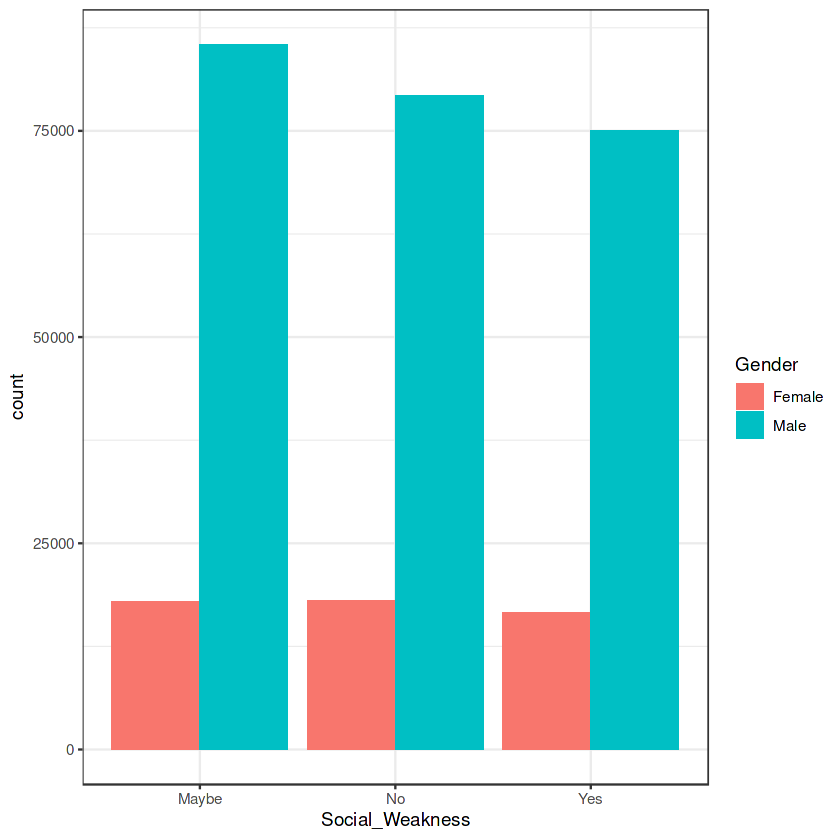

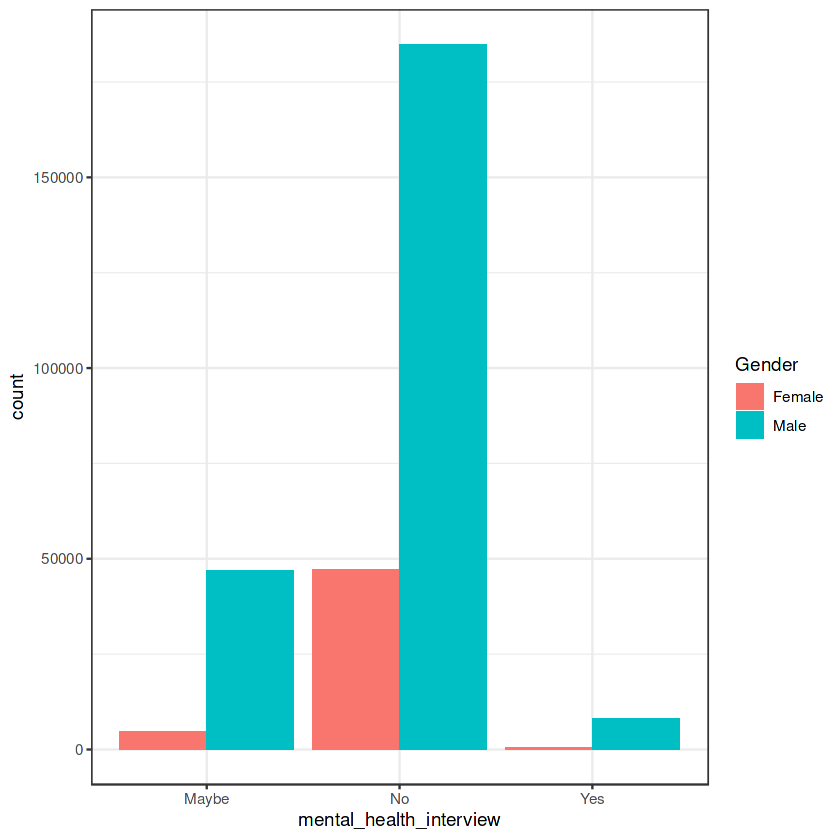

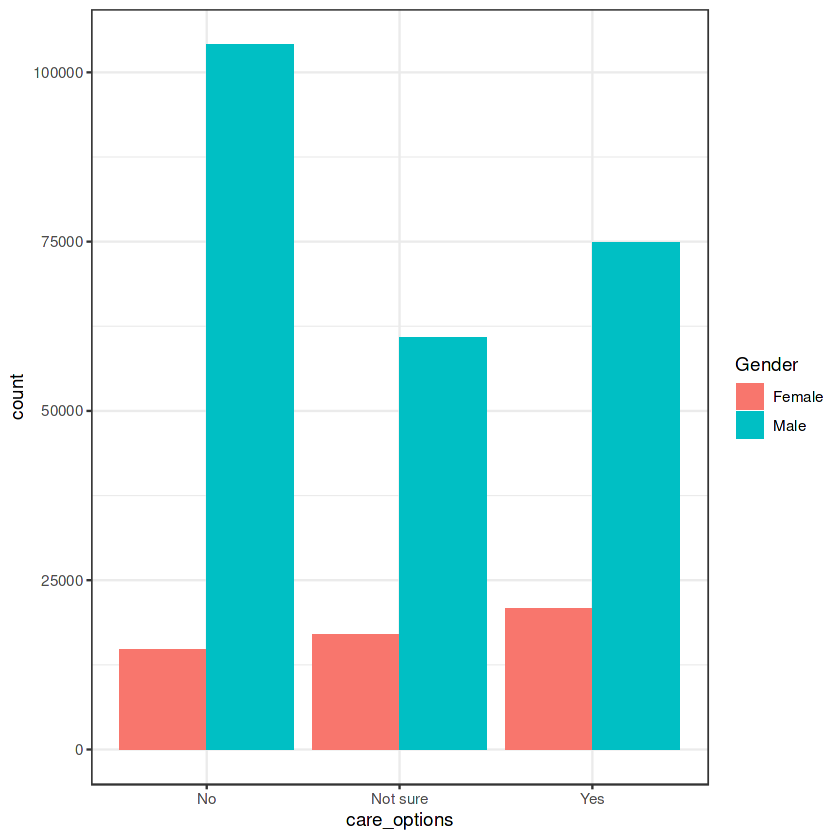

In [208]:
for (i in cols){
    print(ggplot(data, aes(x = data[,i], fill = Gender)) + geom_bar(position = 'dodge')+ xlab(i) + theme_bw())
}

------------

**2014 data**

In [231]:
data2014 <- data  %>% filter(Year == '2014') 

In [232]:
cols_2014 = colnames(data[,c(-1,-3,-18,-19)])

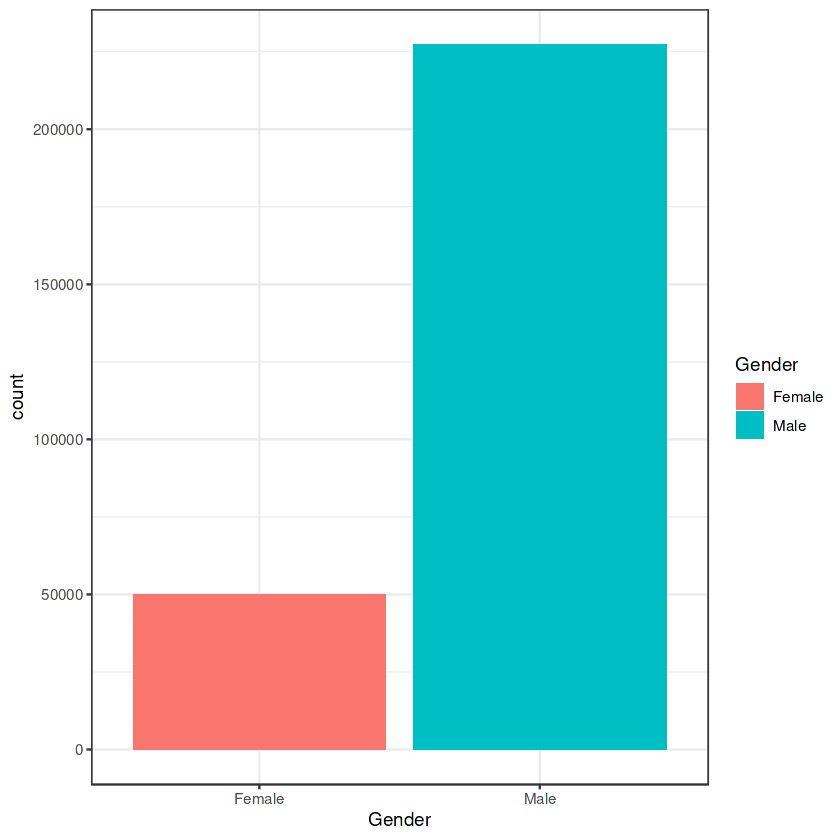

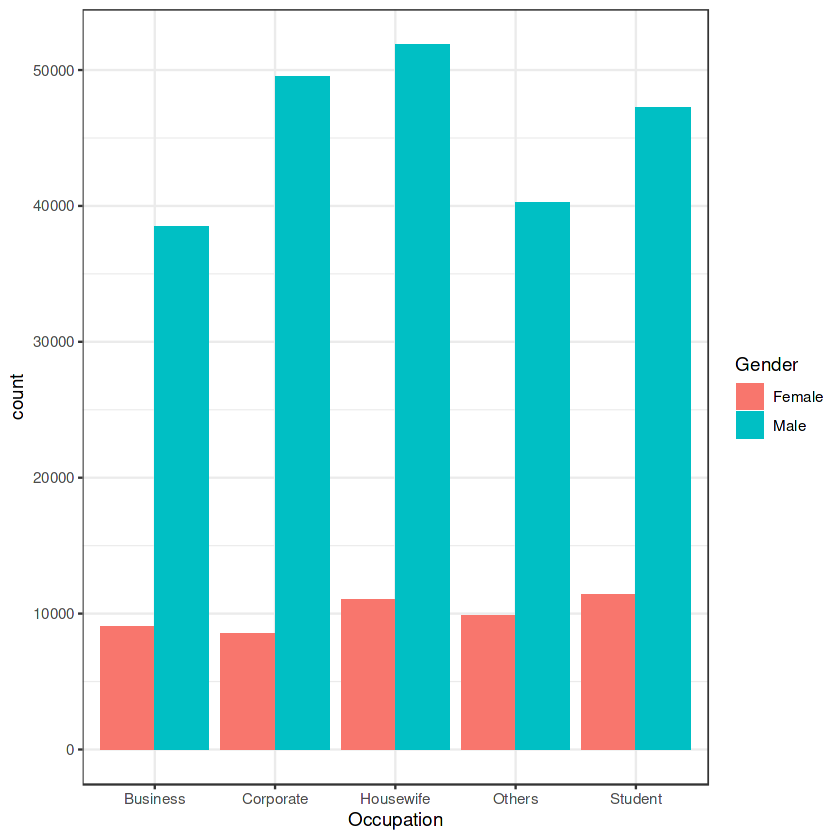

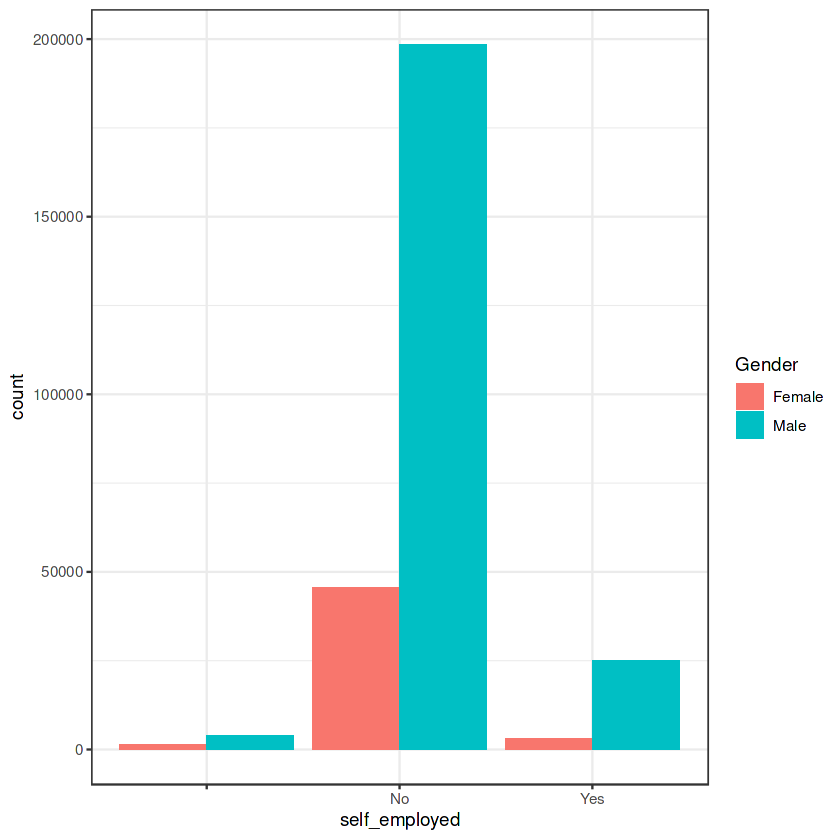

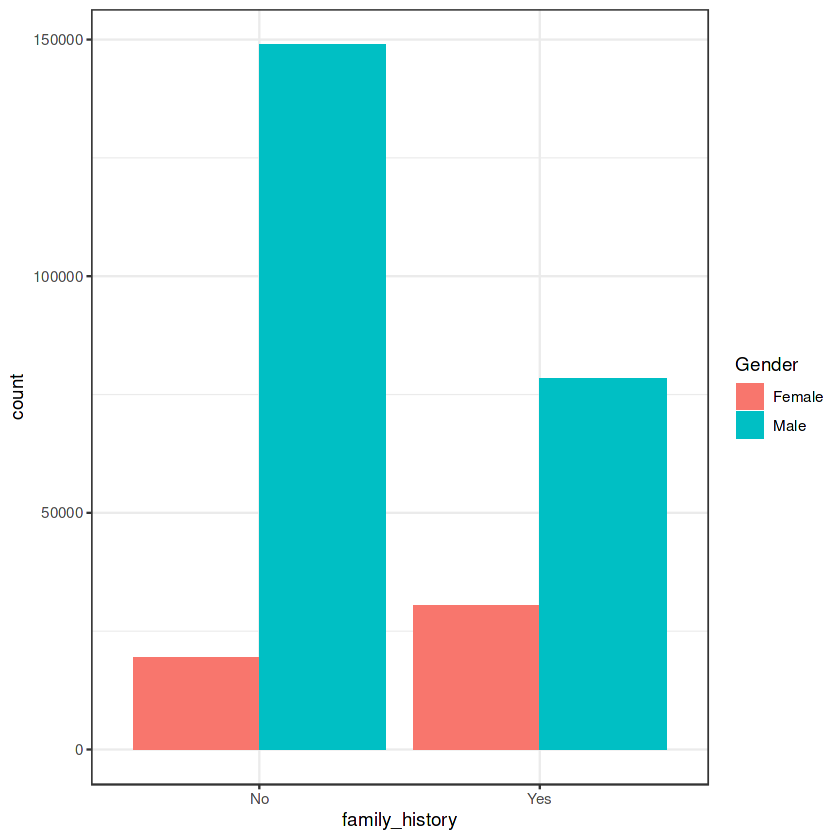

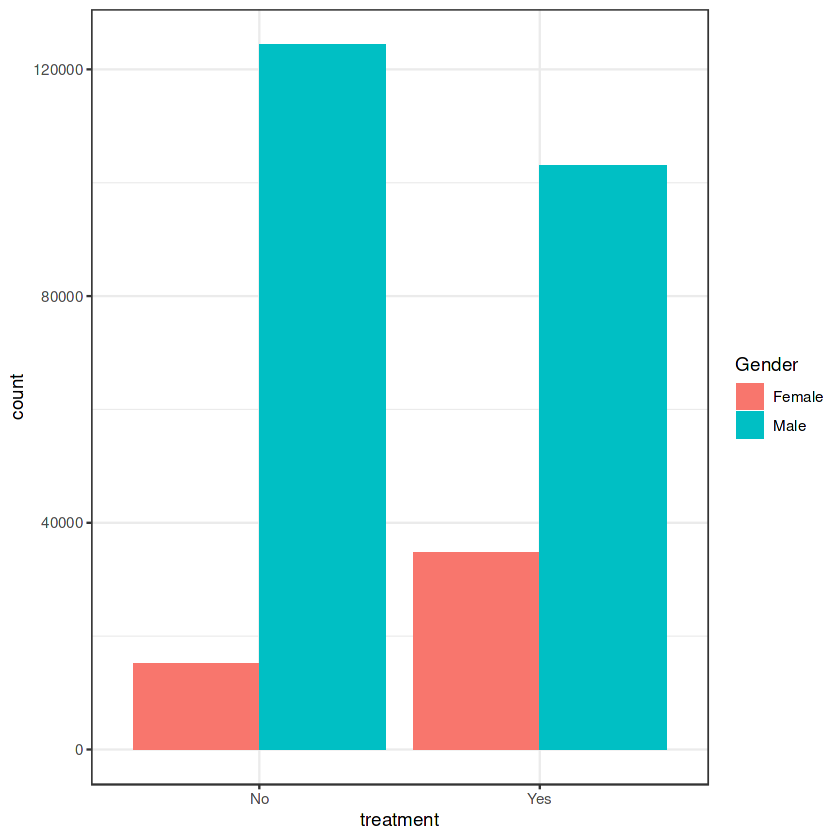

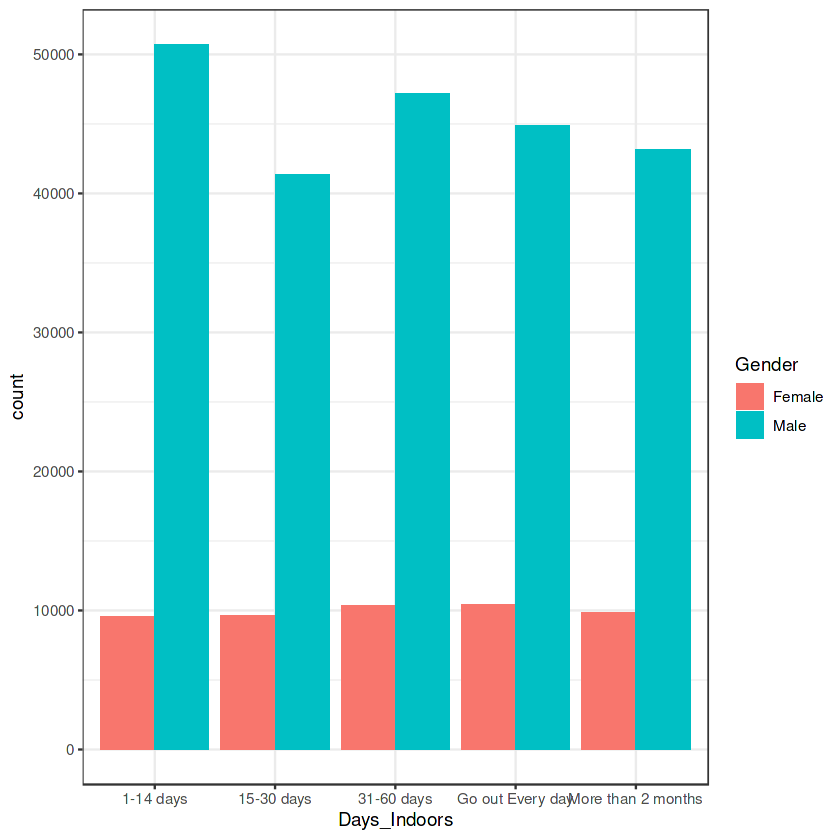

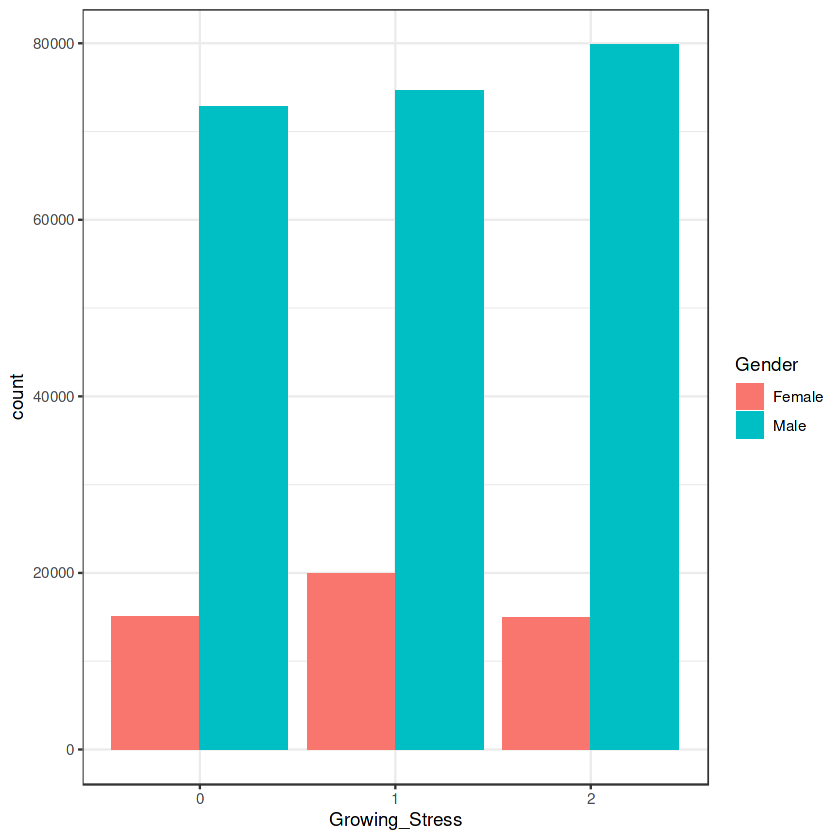

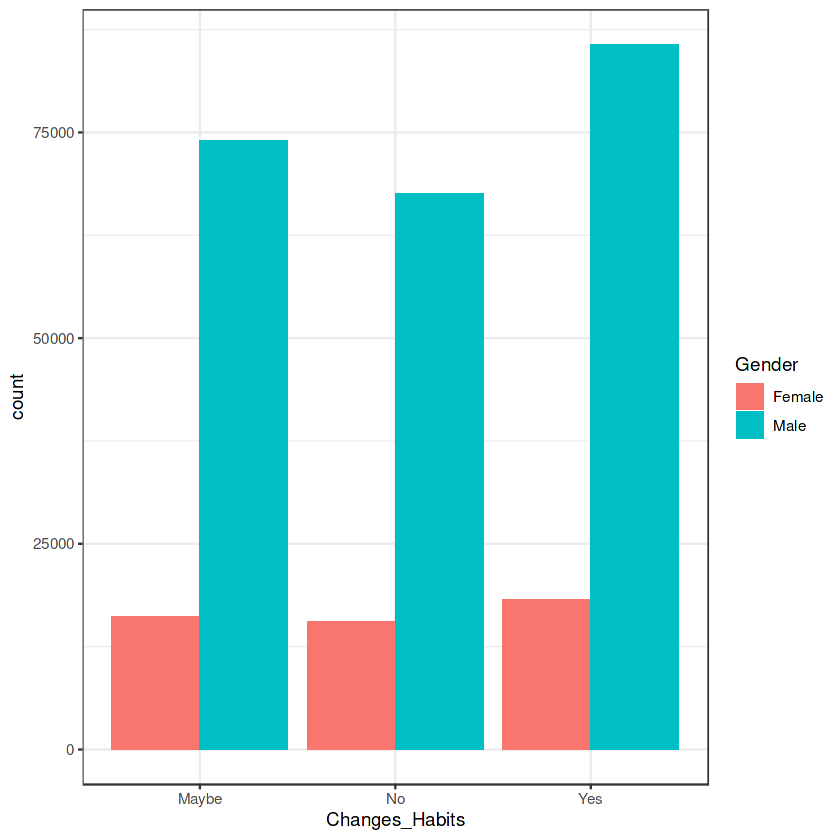

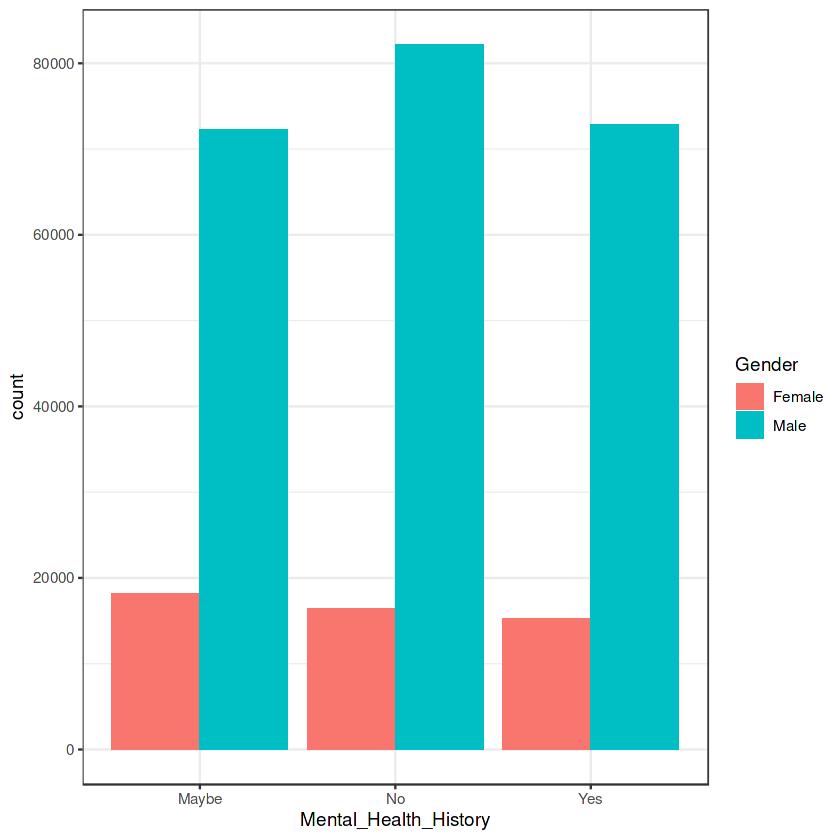

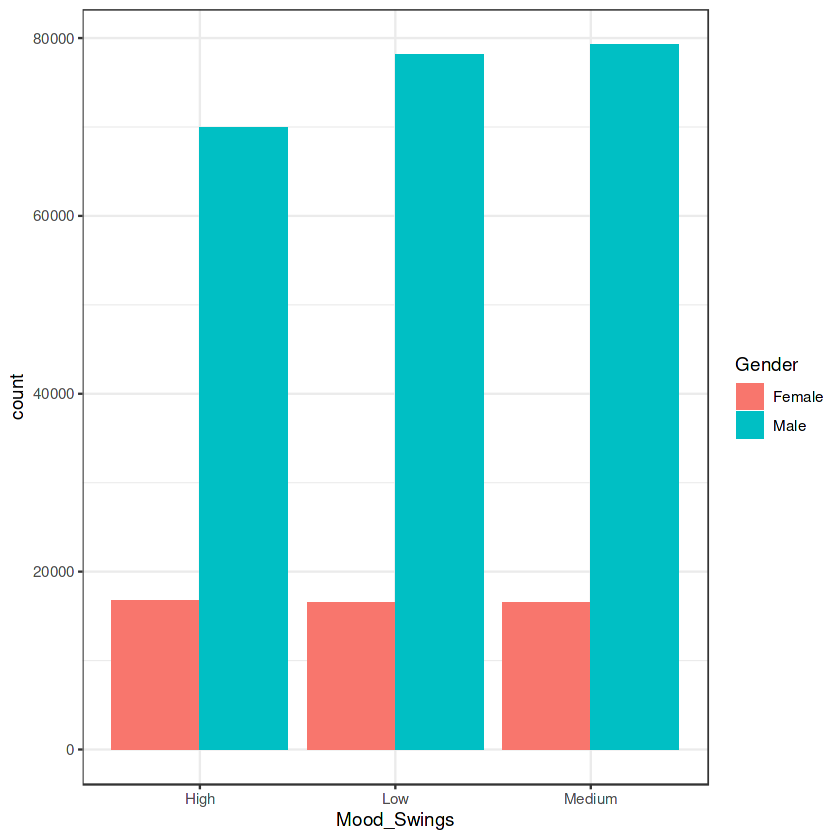

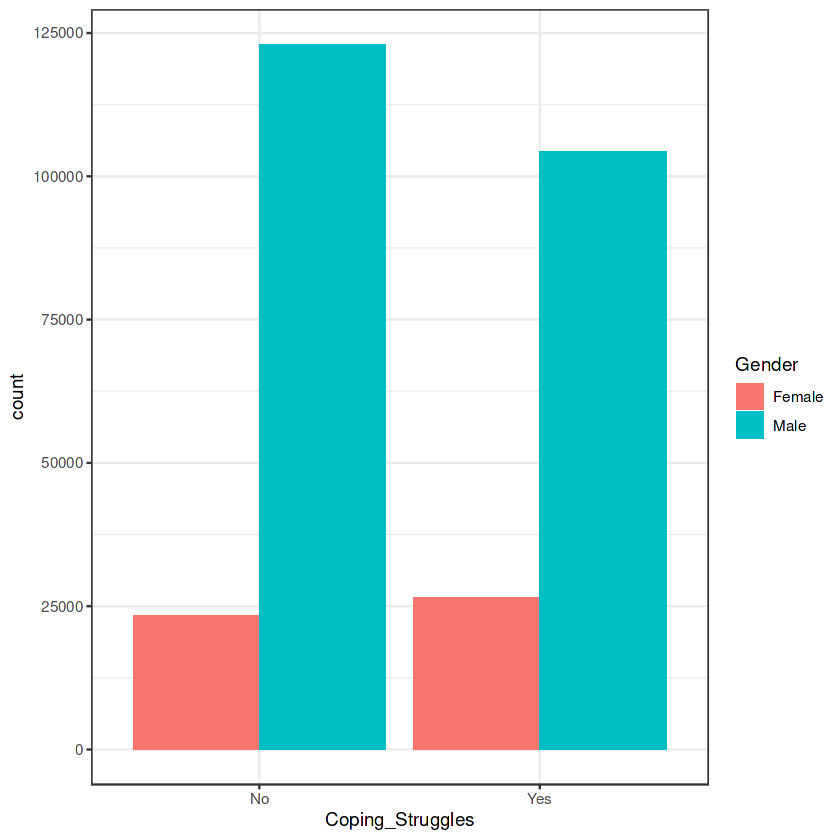

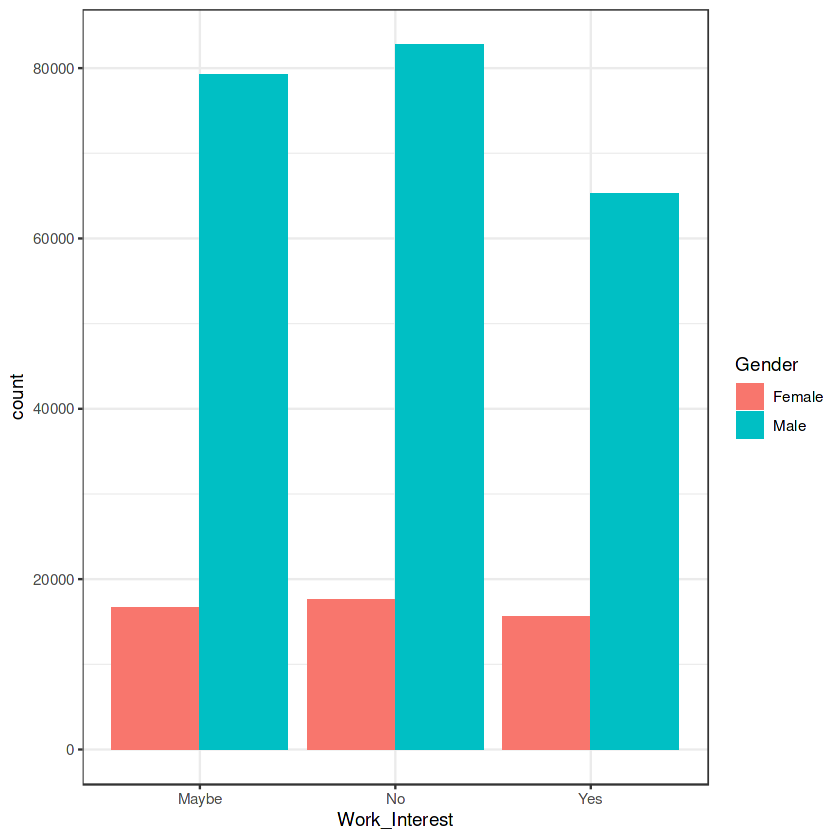

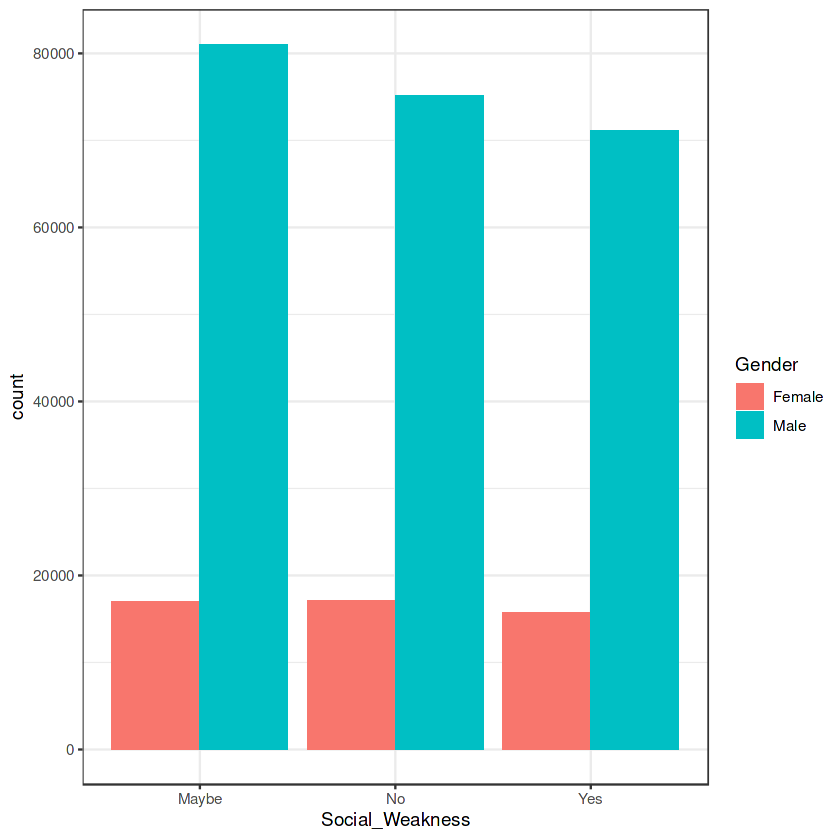

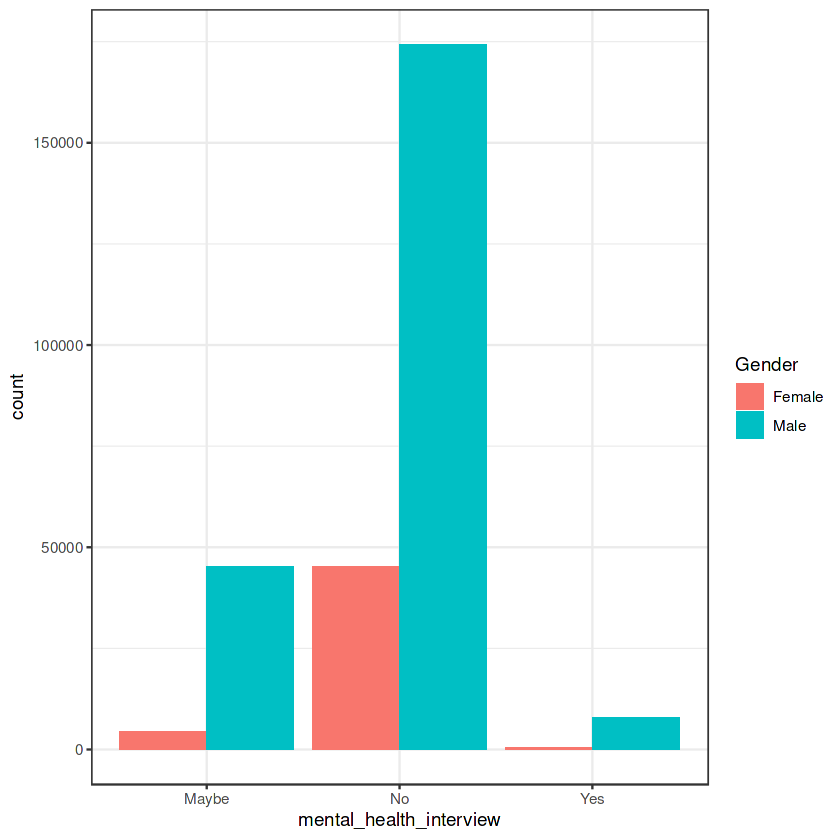

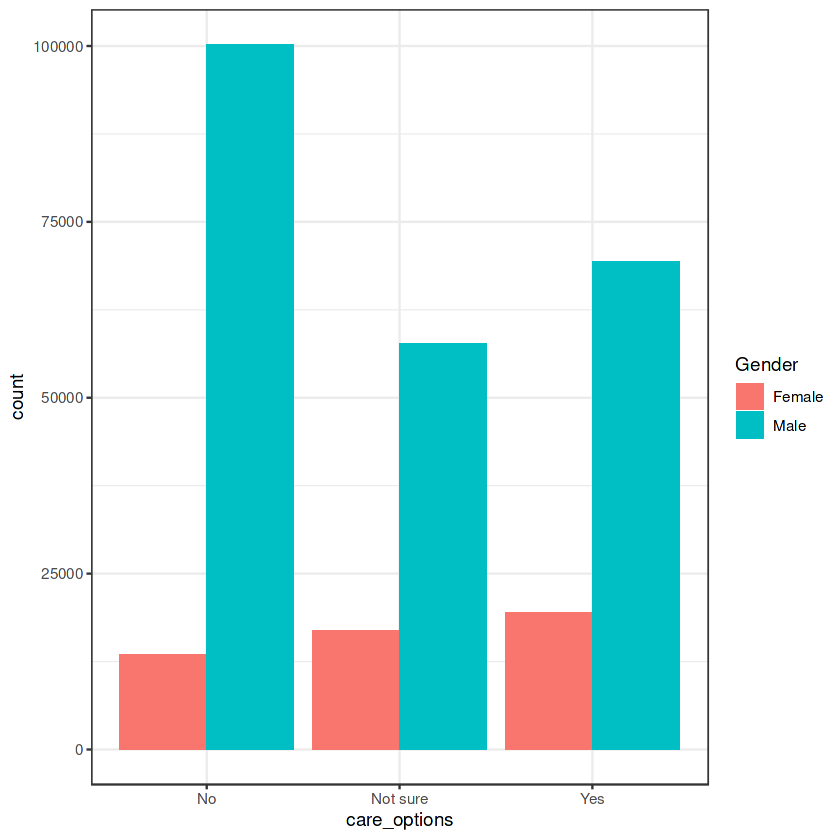

In [233]:
for (i in cols_2014){
    print(ggplot(data2014, aes(x = data2014[,i], fill = Gender )) + geom_bar(position = 'dodge')+ xlab(i) + theme_bw())
}

**The trend is similar to the overall data, with the largest number of data in 2014.**

-------------

**Days_Indoor aggregation (by Growing_stress)**

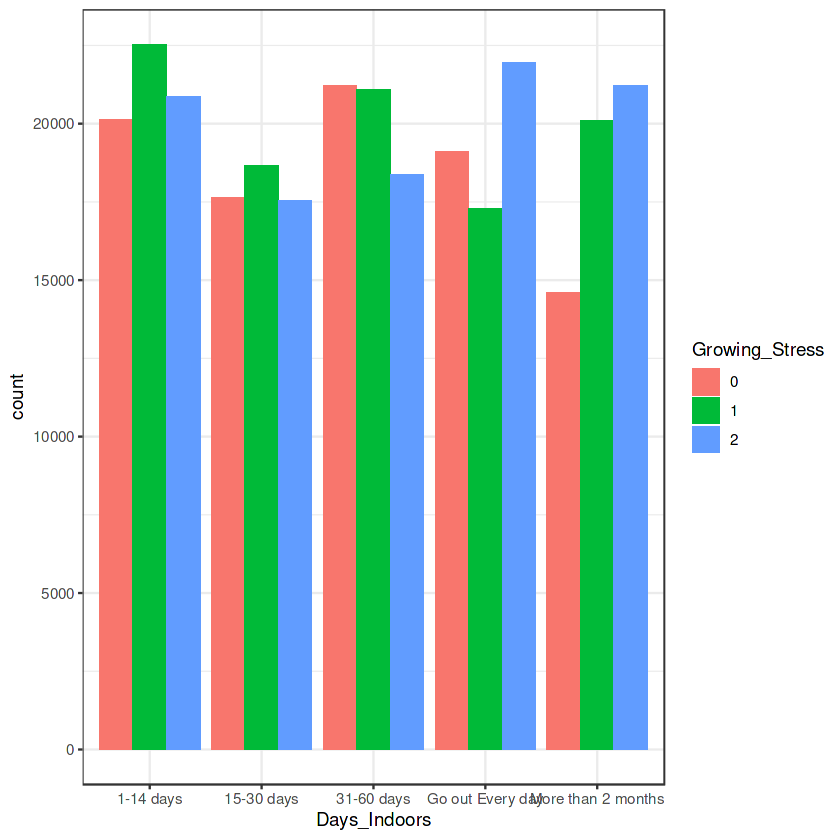

In [242]:
ggplot(data , aes(x=Days_Indoors, fill = Growing_Stress )) + geom_bar(position = 'dodge') + theme_bw() 

**Days_Indoor aggregation (by mental_health_interview)**

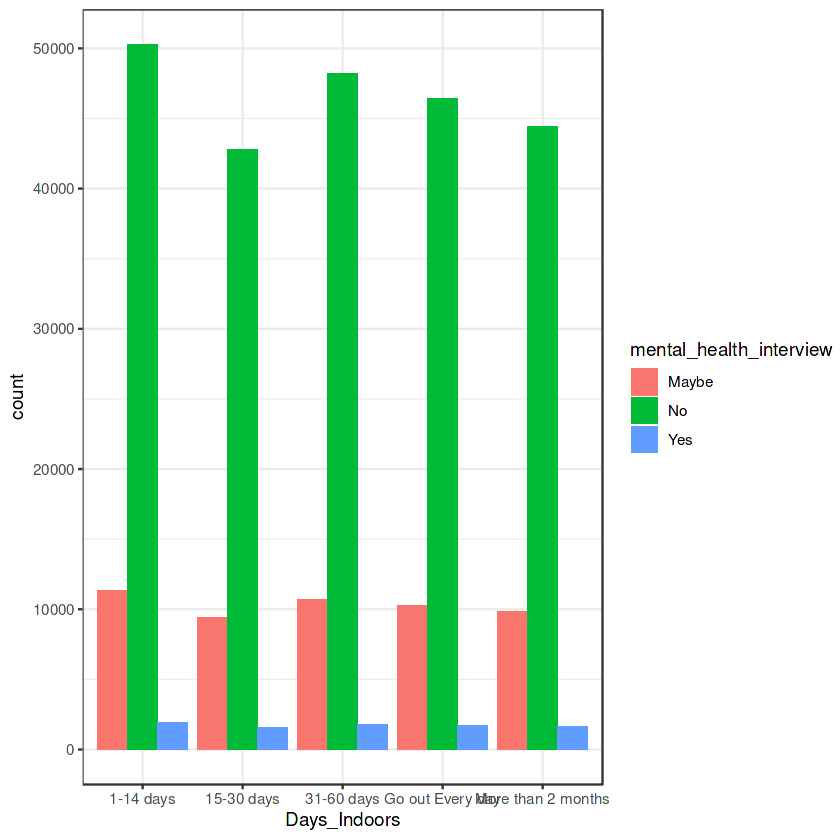

In [247]:
ggplot(data , aes(x=Days_Indoors, fill = mental_health_interview )) + geom_bar(position = 'dodge') + theme_bw() 

--------------

**Density plot (Growing_Stress)**

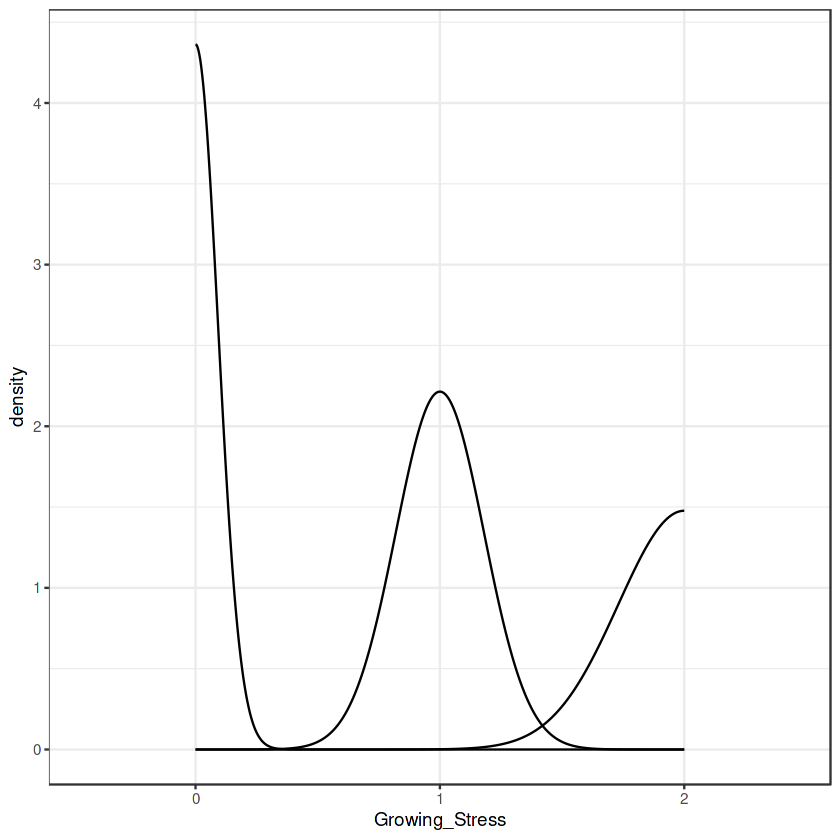

In [246]:
ggplot(data, aes(x=Growing_Stress)) + geom_density() + theme_bw()

**Density plot (mental_health_interview)**

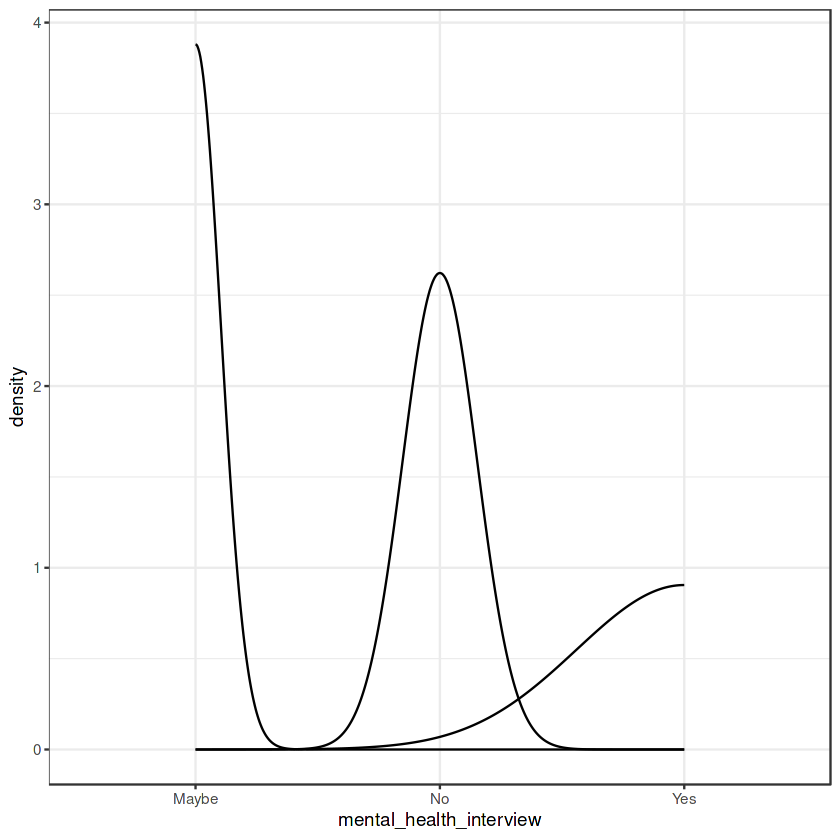

In [248]:
ggplot(data, aes(x=mental_health_interview)) + geom_density() + theme_bw()

**Please leave your advice in the comments. Thank you**